## Stability in the SSY Model

In [1]:
include("src/utilities.jl")
include("src/ssy_discretized.jl")

compute_mm_coef

In [2]:
using PyPlot
plt = PyPlot

PyPlot

In [3]:
ssy = SSY_default()

SSY{Float64}(0.987, 0.215, 0.0032, 1.0, 0.992, 0.06244997998398398, 0.991, 0.09797958971132711)

In [4]:
ez = EpsteinZinSSY()

EpsteinZin{Float64}(1.97, 8.89, 0.999, 0.0010000000000000009, -16.0240206185567)

In [5]:
compute_mm_coef(ssy, ez)

1.041339972867554

In [6]:
compute_growth_upper_bound(ssy, 8, 8, 8, 0.0016)

0.051833327494266834

### Spectral Radius Plot, SSY Parameters

In [7]:
J = 20 # grid size
R = Array{Float64}(J, J);

In [8]:
x_vals = linspace(1.25, 2.25, J)          # ψ
y_vals = linspace(0.0005, 0.008, J)        # μ`

0.0005:0.00039473684210526315:0.008

In [9]:
for (i, x) in enumerate(x_vals)
    for (j, y) in enumerate(y_vals)
        ez = EpsteinZinSSY(ψ=x)
        @assert ez.θ < 0 "Detected non-negative theta value"
        K = compute_K_ssy(ez, ssy, μ=y)
        R[i, j] = compute_spec_rad(K)
    end
end

In [10]:
ez = EpsteinZinSSY() # Get a fresh copy
μ=0.0016

0.0016

In [11]:
ez.ψ

1.97

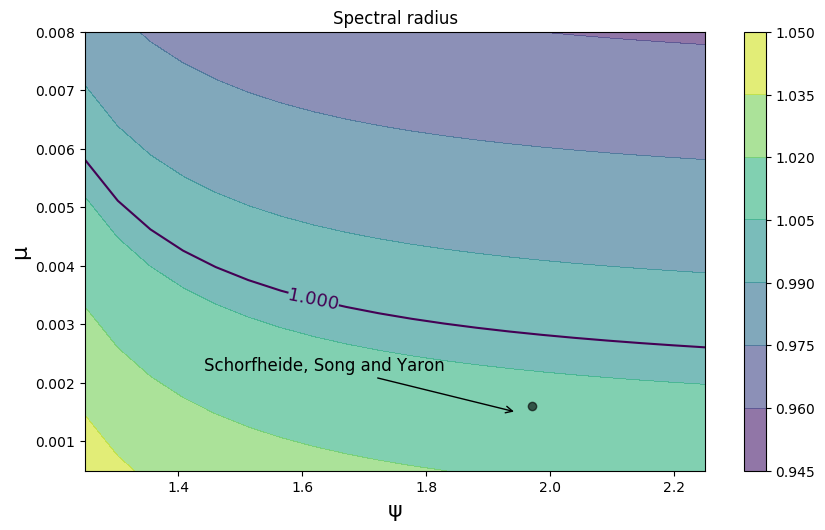

In [12]:
fig, ax = plt.subplots(figsize=(10, 5.7))

cs1 = ax[:contourf](x_vals, 
                    y_vals, 
                    R',
                    alpha=0.6)
                    #levels=lvs,


ctr1 = ax[:contour](x_vals, 
                    y_vals, 
                    R', 
                    levels=[1.0])

plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax[:set_title]("Spectral radius")
ax[:set_xlabel]("ψ", fontsize=16)
ax[:set_ylabel]("μ", fontsize=16)


ax[:annotate]("Schorfheide, Song and Yaron ", 
         xy=(ez.ψ - 0.024, μ - 0.0001),  
         xycoords="data",
         xytext=(-225, 30),
         textcoords="offset points",
         fontsize=12,
         arrowprops=Dict("arrowstyle" => "->"))

ax[:plot]([ez.ψ], [μ],  "ko", alpha=0.6)

plt.savefig("ssy_pm.pdf")
plt.show()

### Let's try varying gamma

In [12]:
x_vals = linspace(4.0, 12.0, J)       # γ
y_vals = linspace(0.0005, 0.006, J)      # μ

0.0005:0.00028947368421052634:0.006

In [13]:
for (i, x) in enumerate(x_vals)
    for (j, y) in enumerate(y_vals)
        ez = EpsteinZinSSY(γ=x)
        @assert ez.θ < 0 "Detected non-negative theta value"
        K = compute_K_ssy(ez, ssy, μ=y)
        R[i, j] = compute_spec_rad(K)
    end
end

In [14]:
ez = EpsteinZinSSY() # Get a fresh copy
μ=0.0016

0.0016

In [15]:
ez.γ

8.6

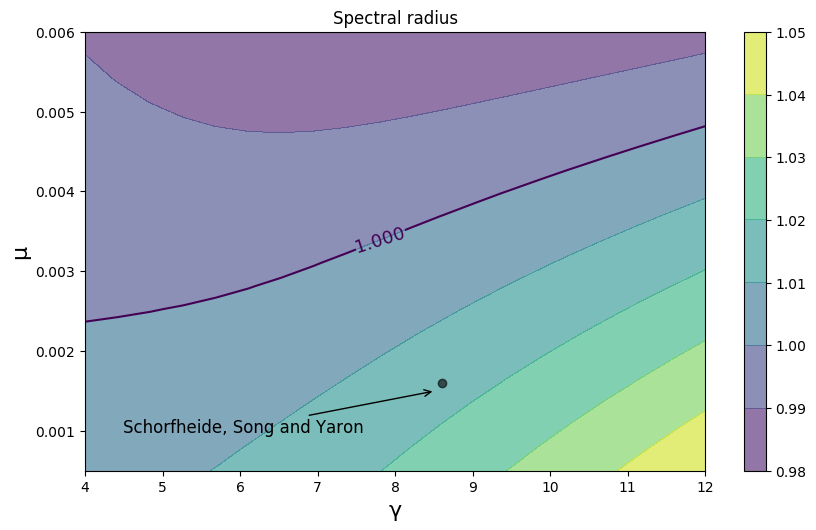

In [16]:
fig, ax = plt.subplots(figsize=(10, 5.7))

#lvs = [0.0, 0.8, 1.0, 1.4, 1.8, 2.2, 4.4]
#cls = [cm.jet(i) for i in np.linspace(0.4, 1, len(lvs))]

cs1 = ax[:contourf](x_vals, 
                    y_vals, 
                    R',
                    alpha=0.6)
                    #levels=lvs,


ctr1 = ax[:contour](x_vals, 
                    y_vals, 
                    R', 
                    levels=[1.0])

plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax[:set_title]("Spectral radius")
ax[:set_xlabel]("γ", fontsize=16)
ax[:set_ylabel]("μ", fontsize=16)


ax[:annotate]("Schorfheide, Song and Yaron ", 
         xy=(ez.γ - 0.084, μ - 0.0001),  
         xycoords="data",
         xytext=(-225, -30),
         textcoords="offset points",
         fontsize=12,
         arrowprops=Dict("arrowstyle" => "->"))

ax[:plot]([ez.γ], [μ],  "ko", alpha=0.6)

plt.savefig("ssy_gm.pdf")
plt.show()

### And now mu and volatility

In [200]:
x_vals = linspace(0.0015, 0.004, J)          # sigma_bar
y_vals = linspace(0.0005, 0.005, J)         # μ

0.0005:0.00023684210526315788:0.005

In [201]:
ssy = SSY_default()

SSY{Float64}(0.987, 0.232, 0.0032, 1.0, 0.994, 0.06244997998398398, 0.991, 0.0938083151964686)

In [202]:
for (i, x) in enumerate(x_vals)
    for (j, y) in enumerate(y_vals)
        ez = EpsteinZinSSY()
        ssy.σ_bar = x
        @assert ez.θ < 0 "Detected non-negative theta value"
        K = compute_K_ssy(ez, ssy, μ=y)
        R[i, j] = compute_spec_rad(K)
    end
end

In [203]:
ez = EpsteinZinSSY() # Get a fresh copy
μ=0.0016
ssy = SSY_default()

SSY{Float64}(0.987, 0.232, 0.0032, 1.0, 0.994, 0.06244997998398398, 0.991, 0.0938083151964686)

In [204]:
ssy.σ_bar

0.0032

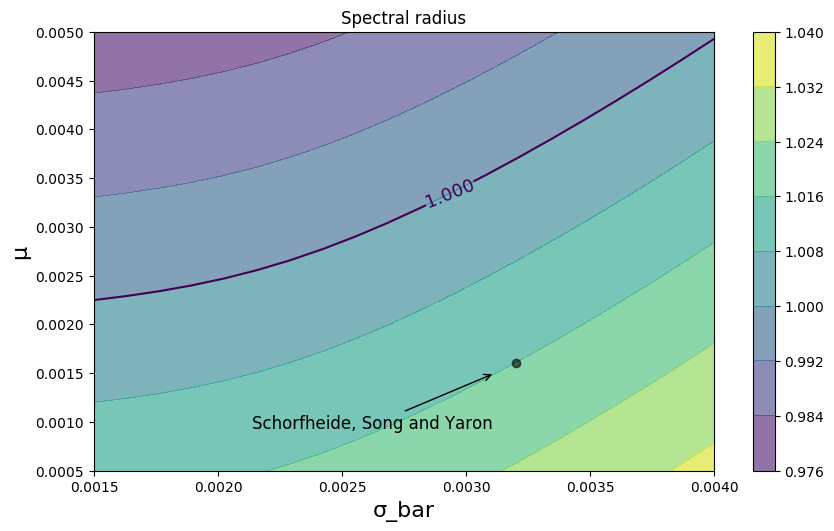

In [205]:
fig, ax = plt.subplots(figsize=(10, 5.7))

#lvs = [0.0, 0.8, 1.0, 1.4, 1.8, 2.2, 4.4]
#cls = [cm.jet(i) for i in np.linspace(0.4, 1, len(lvs))]

cs1 = ax[:contourf](x_vals, 
                    y_vals, 
                    R',
                    alpha=0.6)
                    #levels=lvs,


ctr1 = ax[:contour](x_vals, 
                    y_vals, 
                    R', 
                    levels=[1.0])

plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax[:set_title]("Spectral radius")
ax[:set_xlabel]("σ_bar", fontsize=16)
ax[:set_ylabel]("μ", fontsize=16)

ax[:annotate]("Schorfheide, Song and Yaron ", 
         xy=(ssy.σ_bar - 0.000084, μ - 0.0001),  
         xycoords="data",
         xytext=(-175, -40),
         textcoords="offset points",
         fontsize=12,
         arrowprops=Dict("arrowstyle" => "->"))

ax[:plot]([ssy.σ_bar], [μ],  "ko", alpha=0.6)

plt.savefig("ssy_sbm.pdf")
plt.show()

### rho and rho_hz

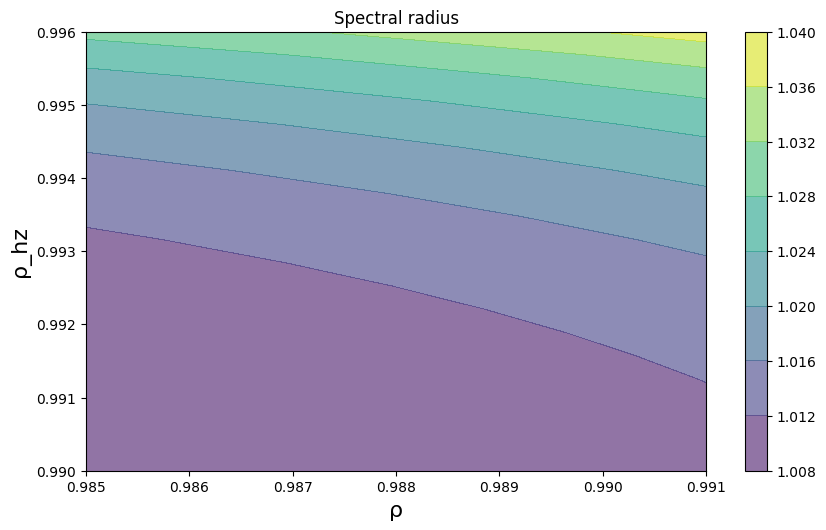

In [6]:
J = 20 # grid size
R = Array{Float64}(J, J);

x_vals = linspace(0.985, 0.991, J)           # ρ
y_vals = linspace(0.99, 0.996, J)           # ρ_hz

for (i, x) in enumerate(x_vals)
    for (j, y) in enumerate(y_vals)
        ssy.ρ = x
        ssy.ρ_hz = y
        @assert ez.θ < 0 "Detected non-negative theta value"
        K = compute_K_ssy(ez, ssy)
        R[i, j] = compute_spec_rad(K)
    end
end

fig, ax = plt.subplots(figsize=(10, 5.7))

#lvs = [0.0, 0.8, 1.0, 1.4, 1.8, 2.2, 4.4]
#cls = [cm.jet(i) for i in np.linspace(0.4, 1, len(lvs))]

cs1 = ax[:contourf](x_vals, 
                    y_vals, 
                    R',
                    alpha=0.6)
                    #levels=lvs,


ctr1 = ax[:contour](x_vals, 
                    y_vals, 
                    R', 
                    levels=[1.0])

plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax[:set_title]("Spectral radius")
ax[:set_xlabel]("ρ", fontsize=16)
ax[:set_ylabel]("ρ_hz", fontsize=16)

plt.show()